In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:,1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60,2035):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train,y_train,epochs = 100,batch_size = 32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1975/1975 [==============================] - 65s 33ms/step - loss: 0.0133
Epoch 2/100
1975/1975 [==============================] - 43s 22ms/step - loss: 0.0030
Epoch 3/100
1975/1975 [==============================] - 55s 28ms/step - loss: 0.0026
Epoch 4/100
1975/1975 [==============================] - 48s 24ms/step - loss: 0.0027
Epoch 5/100
1975/1975 [==============================] - 51s 26ms/step - loss: 0.0022
Epoch 6/100
1975/1975 [==============================] - 50s 25ms/step - loss: 0.0026
Epoch 7/100
1975/1975 [==============================] - 48s 24ms/step - loss: 0.0020
Epoch 8/100
1975/1975 [==============================] - 49s 25ms/step - loss: 0.0020
Epoch 9/100
1975/1975 [==============================] - 51s 26ms/step - loss: 0.0017
Epoch 10/10

1975/1975 [==============================] - 47s 24ms/step - loss: 6.9497e-04
Epoch 73/100
1975/1975 [==============================] - 32s 16ms/step - loss: 6.9192e-04
Epoch 74/100
1975/1975 [==============================] - 44s 22ms/step - loss: 7.3418e-04
Epoch 75/100
1975/1975 [==============================] - 46s 23ms/step - loss: 6.6800e-04
Epoch 76/100
1975/1975 [==============================] - 48s 24ms/step - loss: 6.0746e-04
Epoch 77/100
1975/1975 [==============================] - 46s 23ms/step - loss: 7.0727e-04
Epoch 78/100
1975/1975 [==============================] - 47s 24ms/step - loss: 6.4253e-04
Epoch 79/100
1975/1975 [==============================] - 44s 22ms/step - loss: 6.6123e-04
Epoch 80/100
1975/1975 [==============================] - 42s 21ms/step - loss: 7.3390e-04
Epoch 81/100
1975/1975 [==============================] - 40s 20ms/step - loss: 6.9378e-04
Epoch 82/100
1975/1975 [==============================] - 52s 26ms/step - loss: 7.0016e-04
Epoch 83/100

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.552032). Check your callbacks.
  % delta_t_median)


1975/1975 [==============================] - 58s 29ms/step - loss: 6.0003e-04
Epoch 85/100
1975/1975 [==============================] - 45s 23ms/step - loss: 6.3052e-04
Epoch 86/100
1975/1975 [==============================] - 40s 20ms/step - loss: 6.7934e-04
Epoch 87/100
1975/1975 [==============================] - 41s 21ms/step - loss: 6.9617e-04
Epoch 88/100
1975/1975 [==============================] - 43s 22ms/step - loss: 7.0992e-04
Epoch 89/100
1975/1975 [==============================] - 42s 21ms/step - loss: 6.3857e-04
Epoch 90/100
1975/1975 [==============================] - 41s 21ms/step - loss: 6.0189e-04
Epoch 91/100
1975/1975 [==============================] - 37s 19ms/step - loss: 7.2189e-04
Epoch 92/100
1975/1975 [==============================] - 31s 16ms/step - loss: 5.7533e-04
Epoch 93/100
1975/1975 [==============================] - 42s 21ms/step - loss: 7.2255e-04
Epoch 94/100
1975/1975 [==============================] - 45s 23ms/step - loss: 6.7799e-04
Epoch 95/100

In [8]:
#https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [11]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

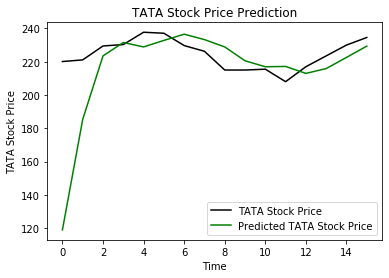

In [12]:
plt.plot(real_stock_price,color = 'black',label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()